# Import needed libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load transformed Data

In [4]:
# Load transformed Data from CSV file
agg_df_dummies_2 = pd.read_csv("transformed_df.csv")
print(agg_df_dummies_2.shape)
display(agg_df_dummies_2.head())
agg_df_dummies_2 = agg_df_dummies_2.drop(agg_df_dummies_2.columns[0], axis=1)
print(agg_df_dummies_2.shape)
agg_df_dummies_2.head()

(94076, 81)


Unnamed: 0                customer_unique_id  review_score  \
0           0  0000366f3b9a7992bf8c76cfdf3221e2           5.0   
1           1  0000b849f77a49e4a4ce2b2a4ca5be3f           4.0   
2           2  0000f46a3911fa3c0805444483337064           3.0   
3           3  0000f6ccb0745a6a4b88665a16c9f078           4.0   
4           4  0004aac84e0df4da2b147fca70cf8255           5.0   

   payment_type_boleto  payment_type_credit_card  payment_type_debit_card  \
0                    0                         1                        0   
1                    0                         1                        0   
2                    0                         1                        0   
3                    0                         1                        0   
4                    0                         1                        0   

   payment_type_voucher  product_category_name_agro_industria_e_comercio  \
0                     0                                                0   
1                     0                                                0   
2                     0                                                0   
3                     0                                                0   
4                     0                                                0   

   product_category_name_alimentos  product_category_name_alimentos_bebidas  \
0                                0                                        0   
1                                0                                        0   
2                                0                                        0   
3                                0                                        0   
4                                0                                        0   

   ...  product_category_name_portateis_casa_forno_e_cafe  \
0  ...                                                  0   
1  ...                                                  0   
2  ...                                                  0   
3  ...                                                  0   
4  ...                                                  0   

   product_category_name_portateis_cozinha_e_preparadores_de_alimentos  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   product_category_name_relogios_presentes  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   product_category_name_seguros_e_servicos  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   product_category_name_sinalizacao_e_seguranca  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   product_category_name_tablets_impressao_imagem  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   product_category_name_telefonia  product_category_name_telefonia_fixa  \
0                                0                                     0   
1                                0                     

(94076, 80)


customer_unique_id  review_score  payment_type_boleto  \
0  0000366f3b9a7992bf8c76cfdf3221e2           5.0                    0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f           4.0                    0   
2  0000f46a3911fa3c0805444483337064           3.0                    0   
3  0000f6ccb0745a6a4b88665a16c9f078           4.0                    0   
4  0004aac84e0df4da2b147fca70cf8255           5.0                    0   

   payment_type_credit_card  payment_type_debit_card  payment_type_voucher  \
0                         1                        0                     0   
1                         1                        0                     0   
2                         1                        0                     0   
3                         1                        0                     0   
4                         1                        0                     0   

   product_category_name_agro_industria_e_comercio  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   product_category_name_alimentos  product_category_name_alimentos_bebidas  \
0                                0                                        0   
1                                0                                        0   
2                                0                                        0   
3                                0                                        0   
4                                0                                        0   

   product_category_name_artes  ...  \
0                            0  ...   
1                            0  ...   
2                            0  ...   
3                            0  ...   
4                            0  ...   

   product_category_name_portateis_casa_forno_e_cafe  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   product_category_name_portateis_cozinha_e_preparadores_de_alimentos  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   product_category_name_relogios_presentes  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   product_category_name_seguros_e_servicos  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   product_category_name_sinalizacao_e_seguranca  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   product_category_name_tablets_impressao_imagem  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   product_category_name_telefonia  product_category_name_telefonia_fixa  \
0           

# Visualisation of data sample

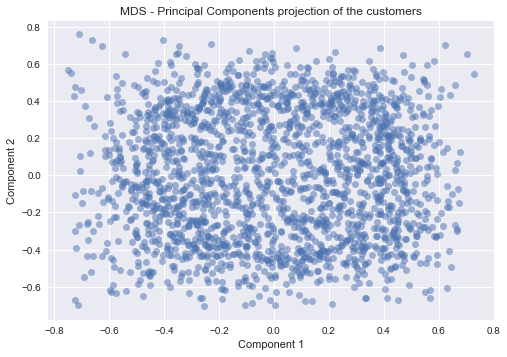

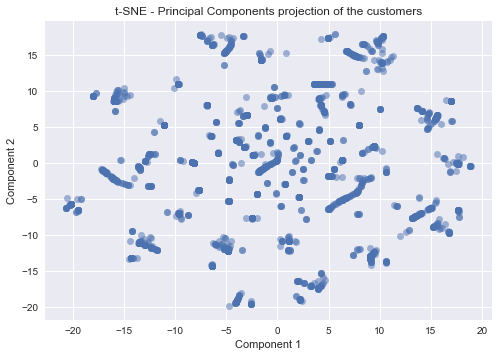

In [5]:
%matplotlib inline
sns.set()

plt.style.use('seaborn')
# Set appropriate colors map for color blindness 
plt.set_cmap('coolwarm')
ax = plt.axes()

from sklearn import preprocessing
from sklearn import manifold

transformed_df = agg_df_dummies_2.drop('customer_unique_id', axis=1)
# Get n random observations from X
X = transformed_df.sample(n = 2000, replace = False).values
# Scale X
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# MDS
mds_ = manifold.MDS(n_components=2, metric=False, random_state=0)
X_mds = mds_.fit_transform(X_scaled)
# Plot MDS
plt.plot(X_mds[:, 0], X_mds[:, 1],'o', alpha=0.5)
plt.title("MDS - Principal Components projection of the customers")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=300, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_scaled)
# Plot t-SNE
plt.plot(X_tsne[:, 0], X_tsne[:, 1],'o', alpha=0.5)
plt.title("t-SNE - Principal Components projection of the customers")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# KMeans

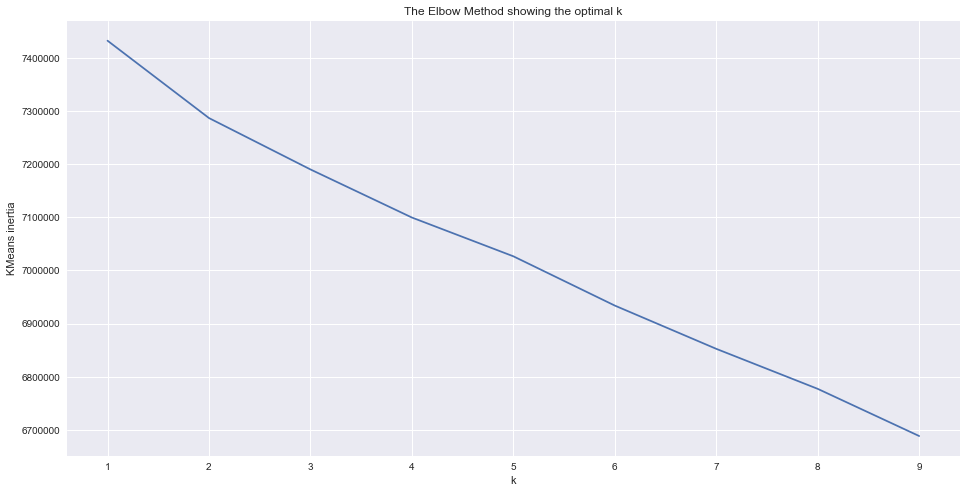

In [5]:
from sklearn.cluster import KMeans

X = transformed_df.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Find the best number of clusters for KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,  init='k-means++', random_state=0).fit(X_scaled)
    # Inertia is the sum of squared distances of samples to their closest cluster center
    distortions.append(kmeanModel.inertia_)

# Show distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('KMeans inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()  

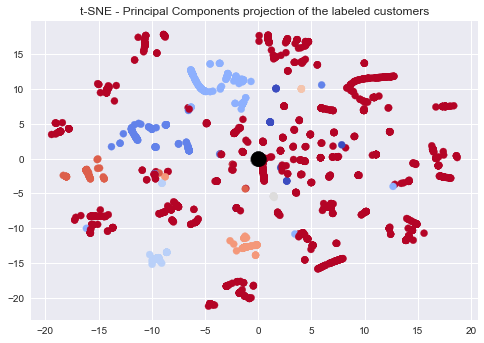

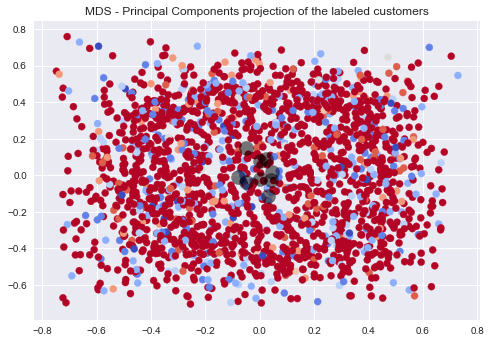

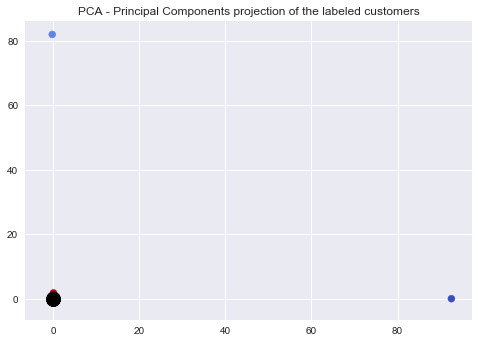

In [6]:
# Apply KMeans with best nb of clusters
kmeans = KMeans(n_clusters=9,  init='k-means++', random_state=0).fit(X_scaled)

# t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=300, init='pca', random_state=0)
idx = np.random.choice(np.arange(len(X_scaled)), 2000, replace=False)
X_tsne = tsne.fit_transform(X_scaled[idx])
# Plot points and clusters centers
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_[idx], s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("t-SNE - Principal Components projection of the labeled customers")
plt.show()

# MDS
mds_ = manifold.MDS(n_components=2, metric=False, random_state=0)
X_mds = mds_.fit_transform(X_scaled[idx])
# Plot MDS
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=kmeans.labels_[idx], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("MDS - Principal Components projection of the labeled customers")
plt.show()

# PCA
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled[idx])
# Plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_[idx], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("PCA - Principal Components projection of the labeled customers")
plt.show()


## KMeans evaluation

In [7]:
import mlflow
import mlflow.sklearn

# Evaluate quality of clustering
from sklearn import metrics

with mlflow.start_run():

    # The best value is 1 and the worst value is -1
    # Values near 0 indicate overlapping clusters
    # Negative => Wrong cluster
    silh = metrics.silhouette_score(X_scaled, kmeans.labels_)
    print("Silhouette Coefficient: %0.3f" % silh)

    # The minimum score is zero, with lower values indicating better clustering
    db_score = metrics.davies_bouldin_score(X_scaled, kmeans.labels_)
    print("Davies_Bouldin score: %0.3f" % db_score)
    
    # Log parameters and metrics in Mlflow
    mlflow.log_param('model', 'KMeans')
    mlflow.log_param('n_clusters', 9)
    mlflow.log_param('init', 'k-means++')

    mlflow.log_metric('Silhouette Coefficient', silh)
    mlflow.log_metric('Davies_Bouldin score', db_score)


Silhouette Coefficient: -0.009
Davies_Bouldin score: 1.864


# Test without product categories

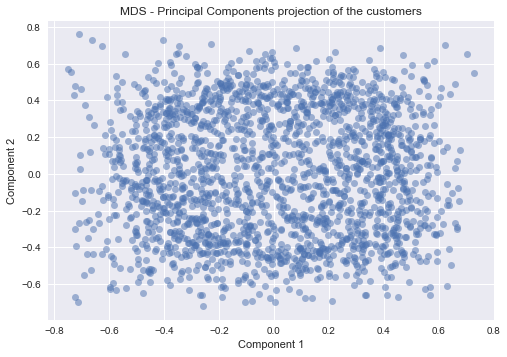

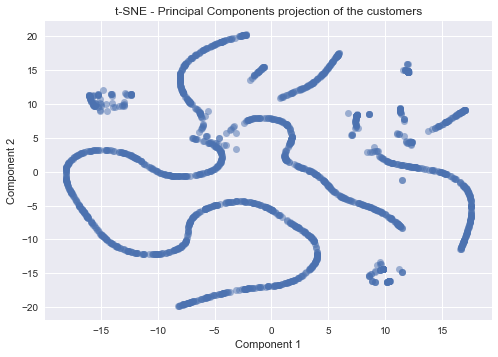

In [8]:
transformed_df = agg_df_dummies_2[['review_score', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card',
                          'payment_type_voucher', 'total_payment']]

# Get n random observations for visualization
X = transformed_df.sample(n = 2000, replace = False).values
# Scale X
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# MDS
mds_ = manifold.MDS(n_components=2, metric=False, random_state=0)
X_mds = mds_.fit_transform(X_scaled)
# Plot MDS
plt.plot(X_mds[:, 0], X_mds[:, 1],'o', alpha=0.5)
plt.title("MDS - Principal Components projection of the customers")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=300, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_scaled)
# Plot t-SNE
plt.plot(X_tsne[:, 0], X_tsne[:, 1],'o', alpha=0.5)
plt.title("t-SNE - Principal Components projection of the customers")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## KMeans

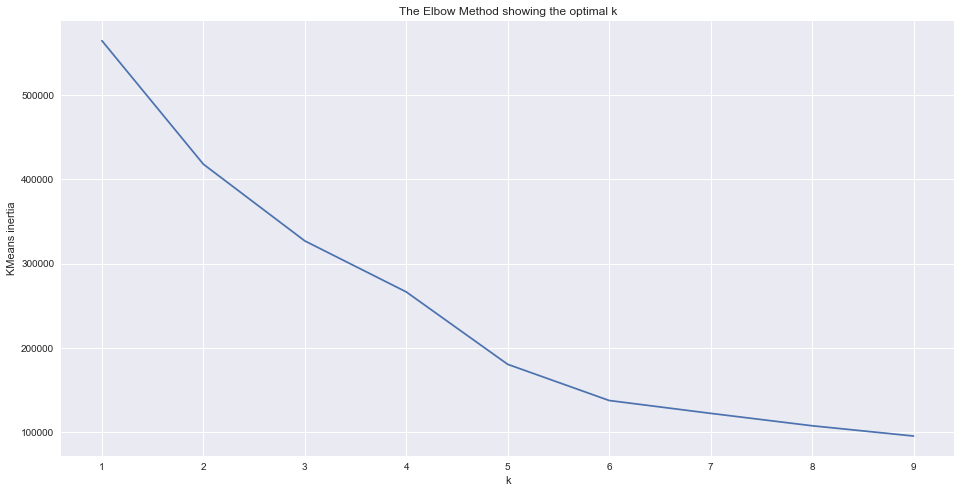

In [9]:
# KMeans
X = transformed_df.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Find the best number of clusters for KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,  init='k-means++', random_state=0).fit(X_scaled)
    # Inertia is the sum of squared distances of samples to their closest cluster center
    distortions.append(kmeanModel.inertia_)

# Show distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('KMeans inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()  

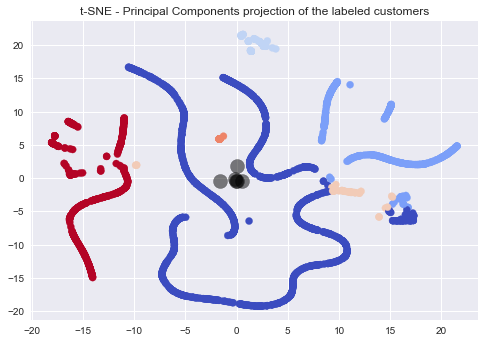

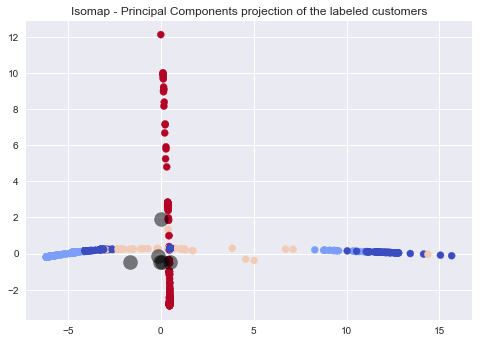

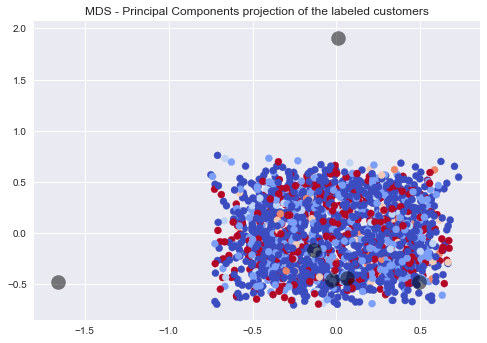

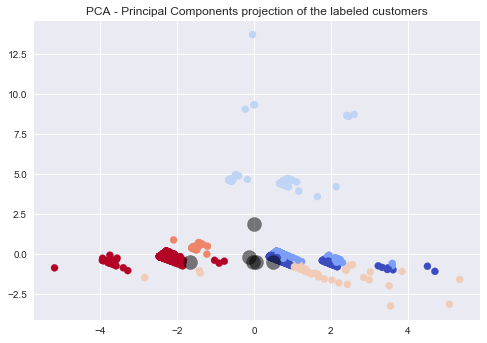

In [10]:
# Apply KMeans with best nb of clusters
kmeans = KMeans(n_clusters=6,  init='k-means++', random_state=0).fit(X_scaled)

# t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=300, init='pca', random_state=0)
idx = np.random.choice(np.arange(len(X_scaled)), 2000, replace=False)
X_tsne = tsne.fit_transform(X_scaled[idx])
# Plot points and clusters centers
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_[idx], s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("t-SNE - Principal Components projection of the labeled customers")
plt.show()

# Isomap
iso_embed = manifold.Isomap(n_components=2)
X_isomap = iso_embed.fit_transform(X_scaled[idx])
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=kmeans.labels_[idx], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("Isomap - Principal Components projection of the labeled customers")
plt.show()

# MDS
mds_ = manifold.MDS(n_components=2, metric=False, random_state=0)
X_mds = mds_.fit_transform(X_scaled[idx])
# Plot MDS
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=kmeans.labels_[idx], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("MDS - Principal Components projection of the labeled customers")
plt.show()

# PCA
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled[idx])
# Plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_[idx], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("PCA - Principal Components projection of the labeled customers")
plt.show()


## KMeans evaluation

In [11]:
# Evaluate quality of clustering

with mlflow.start_run():
    # The best value is 1 and the worst value is -1
    # Values near 0 indicate overlapping clusters
    # Negative => Wrong cluster
    # 0.596, 0.668: with and without init=kmeans++; no impact
    silh = metrics.silhouette_score(X_scaled, kmeans.labels_)
    print("Silhouette Coefficient: %0.3f" % silh)

    # The minimum score is zero, with lower values indicating better clustering
    db_score = metrics.davies_bouldin_score(X_scaled, kmeans.labels_)
    print("Davies_Bouldin score: %0.3f" % db_score)

    # Log parameters and metrics in Mlflow
    mlflow.log_param('model', 'KMeans')
    mlflow.log_param('n_clusters', 6)
    mlflow.log_param('init', 'k-means++')

    mlflow.log_metric('Silhouette Coefficient', silh)
    mlflow.log_metric('Davies_Bouldin score', db_score)

Silhouette Coefficient: 0.596
Davies_Bouldin score: 0.668


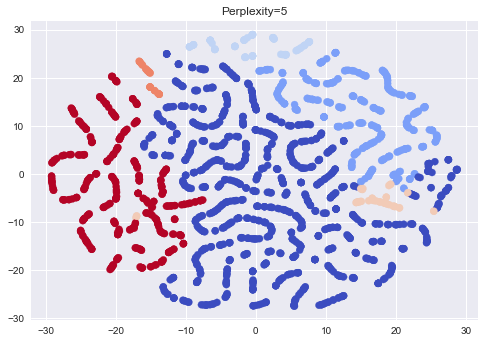

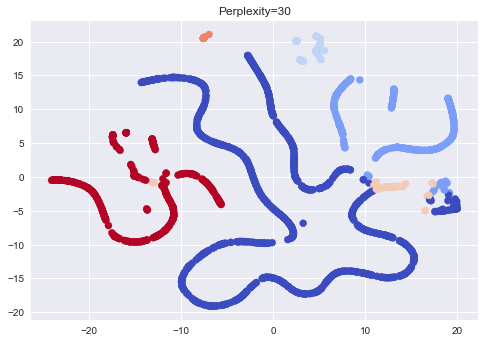

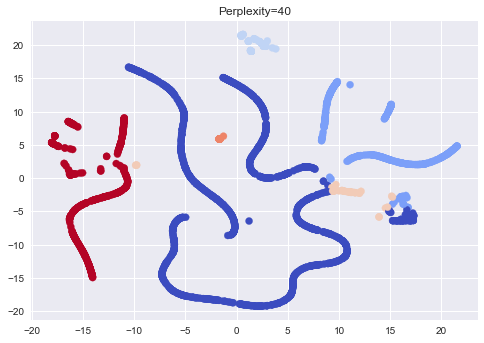

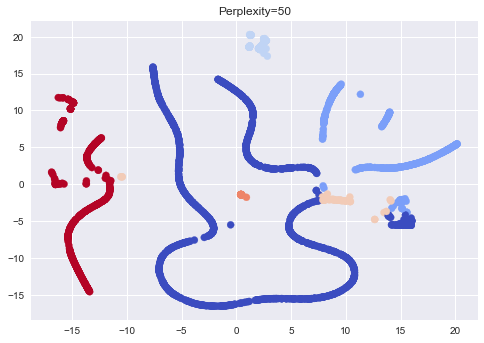

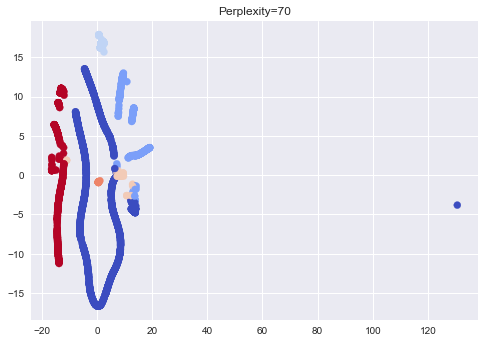

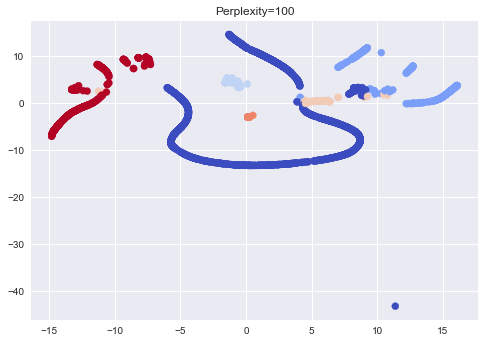

In [12]:
# Tune perplexity for better visualization
perplexities = [5, 30, 40, 50, 70, 100]
for perplexity in perplexities:
    tsne = manifold.TSNE(n_components=2, n_iter=300, init='pca', random_state=0, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_scaled[idx])
    plt.title("Perplexity=%d" % perplexity)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_[idx], s=50)
    plt.show()


In [13]:
# Check that customers groups are relevant

# unique_items, counts = np.unique(kmeans.labels_, return_counts=True)
# idx_label = np.random.choice(np.where(kmeans.labels_ == 0), 5, replace=False)

for clus in range(6):
    print("Cluster {}: ".format(clus))
    display(transformed_df.iloc[(np.where(kmeans.labels_ == clus))[0][:5]])
    print("\n")


Cluster 0: 


review_score  payment_type_boleto  payment_type_credit_card  \
0           5.0                    0                         1   
1           4.0                    0                         1   
3           4.0                    0                         1   
4           5.0                    0                         1   
5           4.0                    0                         1   

   payment_type_debit_card  payment_type_voucher  total_payment  
0                        0                     0         141.90  
1                        0                     0          27.19  
3                        0                     0          43.62  
4                        0                     0         196.89  
5                        0                     0         166.98



Cluster 1: 


review_score  payment_type_boleto  payment_type_credit_card  \
2            3.0                    0                         1   
7            1.0                    0                         2   
9            1.0                    0                         1   
10           3.0                    0                         1   
18           2.0                    0                         2   

    payment_type_debit_card  payment_type_voucher  total_payment  
2                         0                     0          86.22  
7                         0                     0         628.77  
9                         0                     0         129.76  
10                        0                     0          29.00  
18                        0                     0         414.67



Cluster 2: 


review_score  payment_type_boleto  payment_type_credit_card  \
19            3.0                    0                         1   
55            3.0                    0                         1   
73            5.0                    0                         1   
141           3.0                    0                         0   
162           5.0                    0                         0   

     payment_type_debit_card  payment_type_voucher  total_payment  
19                         0                     1          78.42  
55                         0                     1         354.87  
73                         0                     1         109.78  
141                        0                     2         175.58  
162                        0                     1          79.51



Cluster 3: 


review_score  payment_type_boleto  payment_type_credit_card  \
124           3.0                    0                         1   
130           5.0                    0                         1   
146           3.0                    0                         1   
184           5.0                    0                         1   
199           2.0                    0                         2   

     payment_type_debit_card  payment_type_voucher  total_payment  
124                        0                     0         993.55  
130                        0                     0        1600.51  
146                        0                     0         777.68  
184                        0                     0         874.42  
199                        0                     0         813.03



Cluster 4: 


review_score  payment_type_boleto  payment_type_credit_card  \
104           5.0                    0                         0   
119           2.0                    0                         0   
161           5.0                    0                         0   
301           5.0                    0                         0   
310           4.0                    0                         0   

     payment_type_debit_card  payment_type_voucher  total_payment  
104                        1                     0         259.15  
119                        1                     0         109.04  
161                        1                     0         190.28  
301                        1                     0         138.74  
310                        1                     0          95.22



Cluster 5: 


review_score  payment_type_boleto  payment_type_credit_card  \
6            4.0                    1                         0   
11           5.0                    1                         0   
13           4.0                    1                         0   
20           5.0                    1                         0   
22           5.0                    2                         0   

    payment_type_debit_card  payment_type_voucher  total_payment  
6                         0                     0          35.38  
11                        0                     0         126.26  
13                        0                     0          82.05  
20                        0                     0          27.75  
22                        0                     0         446.70

In [14]:
# Check min and max of total_payment for each cluster
print(transformed_df.shape)
print(kmeans.labels_.shape)

labeled_df = transformed_df.copy()
labeled_df['cluster_label'] = kmeans.labels_
display(labeled_df.head())

for clus in range(6):
    print("Cluster {}: ".format(clus))
    print("Min of total payment: {:.2f}".format(labeled_df[labeled_df['cluster_label'] == clus]['total_payment'].min()))
    print("Max of total payment: {:.2f}".format(labeled_df[labeled_df['cluster_label'] == clus]['total_payment'].max()))
    print("Shape of cluster {}: {}".format(clus, labeled_df[labeled_df['cluster_label'] == clus].shape))

(94076, 6)
(94076,)


review_score  payment_type_boleto  payment_type_credit_card  \
0           5.0                    0                         1   
1           4.0                    0                         1   
2           3.0                    0                         1   
3           4.0                    0                         1   
4           5.0                    0                         1   

   payment_type_debit_card  payment_type_voucher  total_payment  cluster_label  
0                        0                     0         141.90              0  
1                        0                     0          27.19              0  
2                        0                     0          86.22              1  
3                        0                     0          43.62              0  
4                        0                     0         196.89              0

Cluster 0: 
Min of total payment: 10.07
Max of total payment: 771.78
Shape of cluster 0: (52892, 7)
Cluster 1: 
Min of total payment: 10.89
Max of total payment: 870.69
Shape of cluster 1: (15589, 7)
Cluster 2: 
Min of total payment: 9.59
Max of total payment: 1591.58
Shape of cluster 2: (3588, 7)
Cluster 3: 
Min of total payment: 649.27
Max of total payment: 13664.08
Shape of cluster 3: (1945, 7)
Cluster 4: 
Min of total payment: 13.38
Max of total payment: 2155.35
Shape of cluster 4: (1473, 7)
Cluster 5: 
Min of total payment: 12.28
Max of total payment: 1403.02
Shape of cluster 5: (18589, 7)


Loop 0:


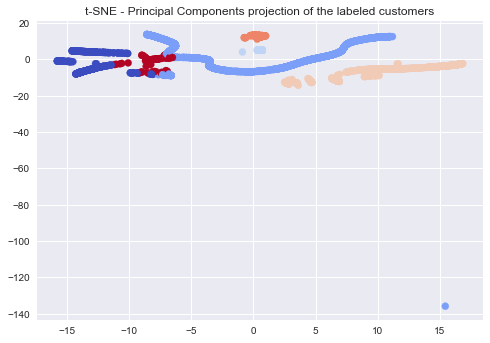

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.70
Loop 1:


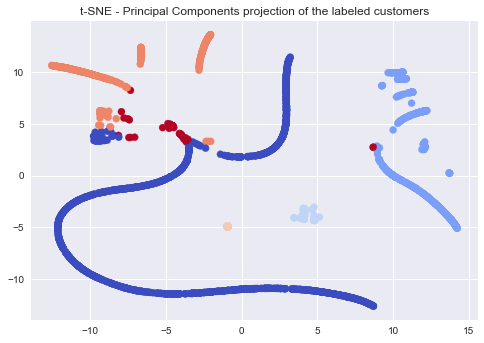

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.66
Loop 2:


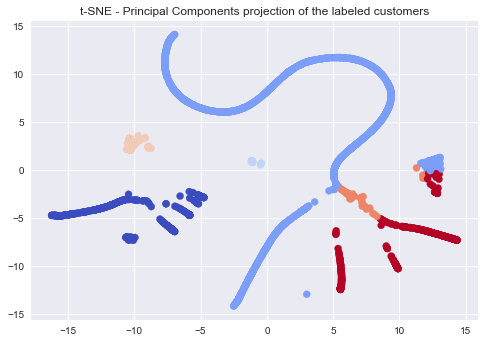

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.66
Loop 3:


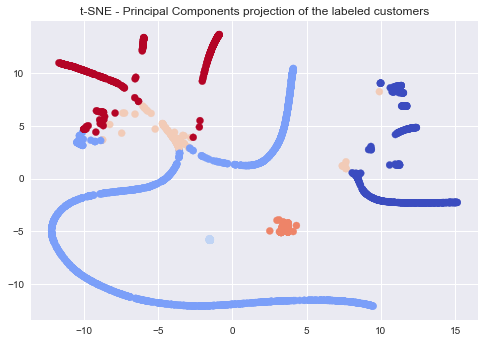

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.64
Loop 4:


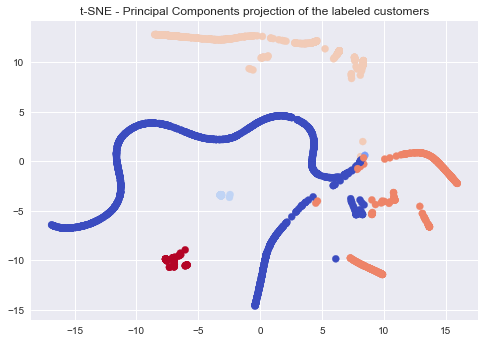

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.52
Loop 5:


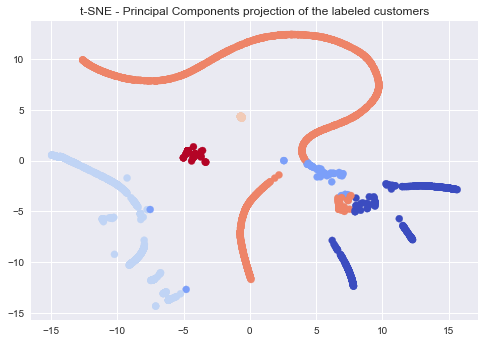

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.64
Loop 6:


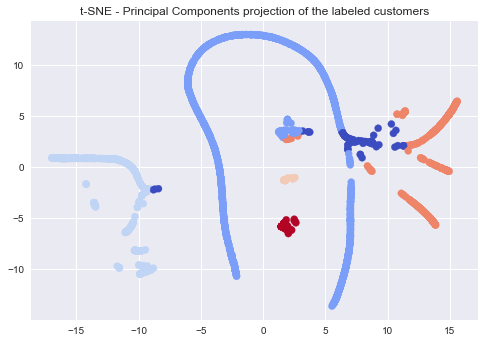

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.71
Loop 7:


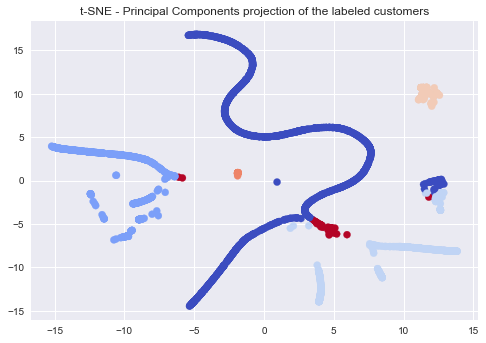

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.65
Loop 8:


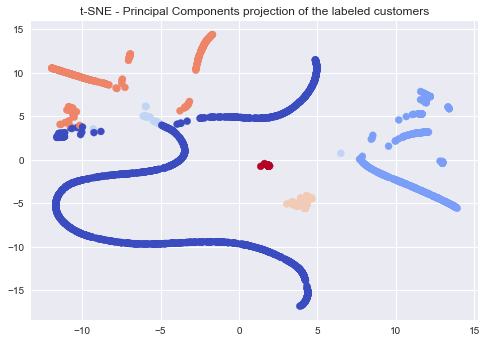

Silhouette Coefficient: 0.58
Davies_Bouldin score: 0.68
Loop 9:


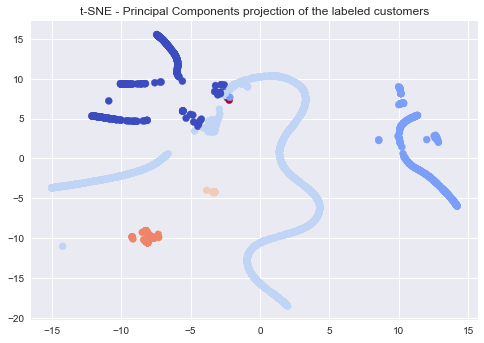

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.48


Mean of Silhouette Coefficient: 0.60
Mean of Davies_Bouldin score: 0.63


In [15]:
# Check KMeans stability
from statistics import mean

silh_list = []
db_score_list = []
with mlflow.start_run():
    for i in range(10):
        print("Loop {}:".format(i))
        idx_kmeans = np.random.choice(np.arange(len(X_scaled)), 2000, replace=False)
        X_kmeans = X_scaled[idx_kmeans]
        kmeans = KMeans(n_clusters=6,  init='k-means++', random_state=0).fit(X_kmeans)

        # Mlflow: Log parameters
        mlflow.log_param('model', 'KMeans')
        mlflow.log_param('n_clusters', 6)
        mlflow.log_param('init', 'k-means++')

        # t-SNE
        X_kmeans_tsne = tsne.fit_transform(X_kmeans)
        # Plot points
        plt.scatter(X_kmeans_tsne[:, 0], X_kmeans_tsne[:, 1], c=kmeans.labels_, s=50)
        plt.title("t-SNE - Principal Components projection of the labeled customers")
        plt.show()
        
        # Evaluate KMeans
        silh = metrics.silhouette_score(X_kmeans, kmeans.labels_)
        db_score = metrics.davies_bouldin_score(X_kmeans, kmeans.labels_)
        silh_list.append(silh)
        db_score_list.append(db_score)
        print("Silhouette Coefficient: %0.2f" % silh)
        print("Davies_Bouldin score: %0.2f" % db_score)

        mlflow.log_metric('Silhouette Coefficient', silh, step=i)
        mlflow.log_metric('Davies_Bouldin score', db_score, step=i)

    print("\n")
    print("Mean of Silhouette Coefficient: {:.2f}".format(mean(silh_list)))
    print("Mean of Davies_Bouldin score: {:.2f}".format(mean(db_score_list)))
    mlflow.log_metric('Mean-Silhouette Coefficient', mean(silh_list))
    mlflow.log_metric('Mean-Davies_Bouldin score', mean(db_score_list))


## DBSCAN

In [41]:
# DBSCAN
from sklearn.cluster import DBSCAN
import timeit

start_time = timeit.default_timer()

# Default: eps=0.5, min_samples=5, metric='euclidean'
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
elapsed = timeit.default_timer() - start_time
print("Elapsed time: {:.2f} sec".format(elapsed))


unique_items, counts = np.unique(dbscan.labels_, return_counts=True)
print("DBSCAN - Number of clusters: {}".format(unique_items.shape[0]))

Elapsed time: 145.34 sec
DBSCAN - Number of clusters: 50


In [42]:
# Evaluate DBSCAN
with mlflow.start_run():
    # The best value is 1 and the worst value is -1
    # Values near 0 indicate overlapping clusters
    # Negative => Wrong cluster

    # Default DBSCAN:
    # Silhouette Coefficient: 0.498
    # Davies_Bouldin score: 1.226
    silh = metrics.silhouette_score(X_scaled, dbscan.labels_)
    print("Silhouette Coefficient: %0.3f" % silh)

    # The minimum score is zero, with lower values indicating better clustering
    db_score = metrics.davies_bouldin_score(X_scaled, dbscan.labels_)
    print("Davies_Bouldin score: %0.3f" % db_score)

    # Log parameters and metrics in Mlflow
    mlflow.log_param('model', 'DBSCAN')
    mlflow.log_param('n_clusters', unique_items.shape[0])
    mlflow.log_param('elapsed_time', elapsed)
    mlflow.log_param('epsilon', 0.5)
    mlflow.log_param('min_samples', 5)
    mlflow.log_param('algorithm', 'auto')

    mlflow.log_metric('Silhouette Coefficient', silh)
    mlflow.log_metric('Davies_Bouldin score', db_score)

Silhouette Coefficient: 0.498
Davies_Bouldin score: 1.226


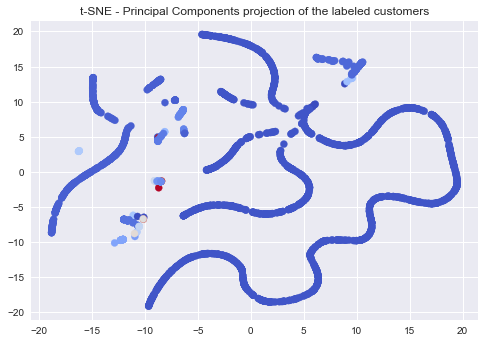

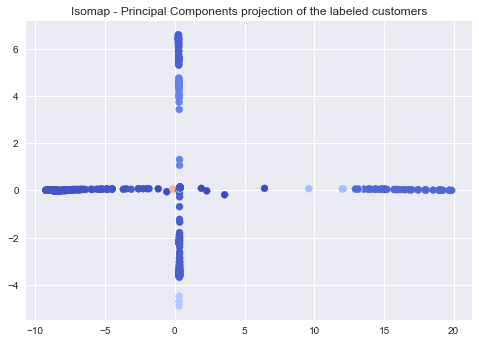

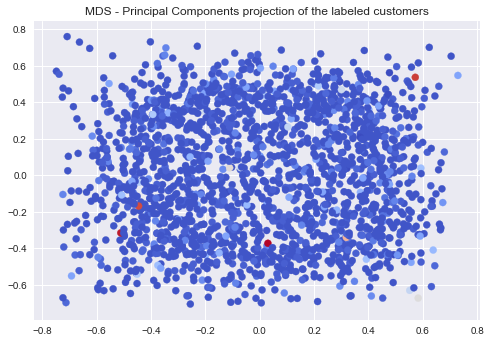

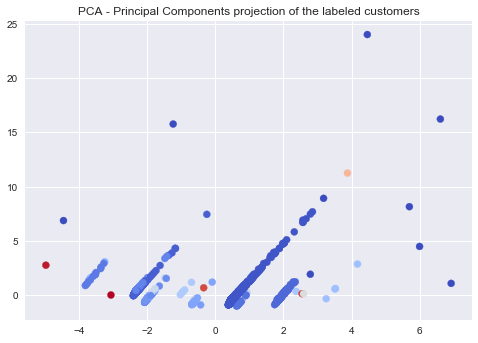

In [43]:
# t-SNE
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=300, init='pca', random_state=0)
# idx = np.random.choice(np.arange(len(X_scaled)), 2000, replace=False)
X_tsne = tsne.fit_transform(X_scaled[idx])
# Plot points and clusters centers
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan.labels_[idx], s=50)
plt.title("t-SNE - Principal Components projection of the labeled customers")
plt.show()

# Isomap
iso_embed = manifold.Isomap(n_components=2)
X_isomap = iso_embed.fit_transform(X_scaled[idx])
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=dbscan.labels_[idx], s=50)
plt.title("Isomap - Principal Components projection of the labeled customers")
plt.show()

# MDS
mds_ = manifold.MDS(n_components=2, metric=False, random_state=0)
X_mds = mds_.fit_transform(X_scaled[idx])
# Plot MDS
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=dbscan.labels_[idx], s=50)
plt.title("MDS - Principal Components projection of the labeled customers")
plt.show()

# PCA
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled[idx])
# Plot PCA
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_[idx], s=50)
plt.title("PCA - Principal Components projection of the labeled customers")
plt.show()


In [44]:
start_time = timeit.default_timer()

# Default: eps=0.5, min_samples=5, metric='euclidean'
# algorithm='ball_tree'
# 82.71 sec
dbscan = DBSCAN(eps=0.6, min_samples=5, algorithm='ball_tree').fit(X_scaled)
elapsed = timeit.default_timer() - start_time
print("Elapsed time: {:.2f} sec".format(elapsed))


unique_items, counts = np.unique(dbscan.labels_, return_counts=True)
print("DBSCAN - Number of clusters: {}".format(unique_items.shape[0]))

Elapsed time: 126.03 sec
DBSCAN - Number of clusters: 51


In [45]:
# Evaluate DBSCAN
with mlflow.start_run():
    # The best value is 1 and the worst value is -1
    # Values near 0 indicate overlapping clusters
    # Negative => Wrong cluster

    # Default DBSCAN:
    # Silhouette Coefficient: 0.498
    # Davies_Bouldin score: 1.226
    silh = metrics.silhouette_score(X_scaled, dbscan.labels_)
    print("Silhouette Coefficient: %0.3f" % silh)

    # The minimum score is zero, with lower values indicating better clustering
    db_score = metrics.davies_bouldin_score(X_scaled, dbscan.labels_)
    print("Davies_Bouldin score: %0.3f" % db_score)
    
    # Log parameters and metrics in Mlflow
    mlflow.log_param('model', 'DBSCAN')
    mlflow.log_param('n_clusters', unique_items.shape[0])
    mlflow.log_param('elapsed_time', elapsed)
    mlflow.log_param('epsilon', 0.6)
    mlflow.log_param('min_samples', 5)
    mlflow.log_param('algorithm', 'ball_tree')

    mlflow.log_metric('Silhouette Coefficient', silh)
    mlflow.log_metric('Davies_Bouldin score', db_score)

Silhouette Coefficient: 0.499
Davies_Bouldin score: 1.252


## Hierarchical clustering



Linkage is:  ward
Affinity is:  euclidean
Loop 0:


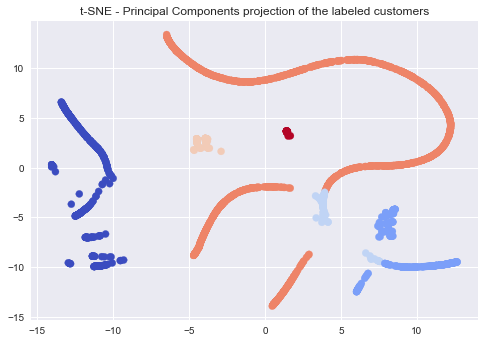

Silhouette Coefficient: 0.62
Davies_Bouldin score: 0.71
Loop 1:


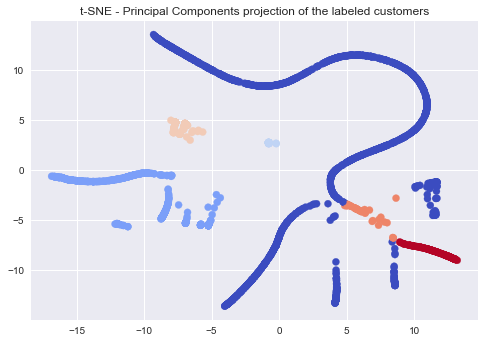

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.56
Loop 2:


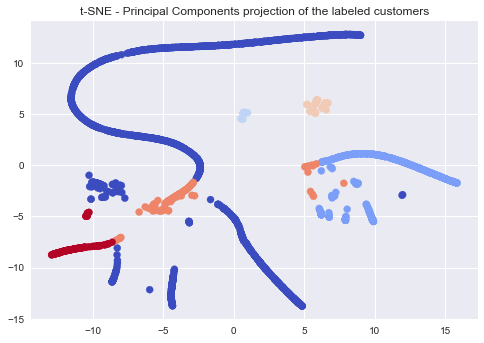

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.70
Loop 3:


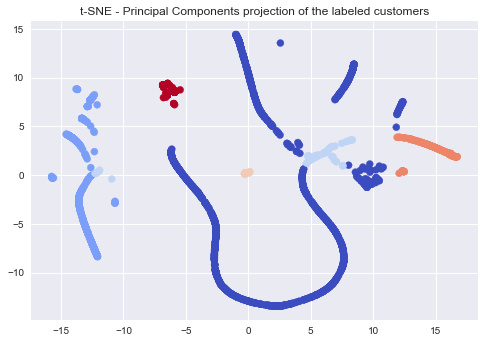

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.61
Loop 4:


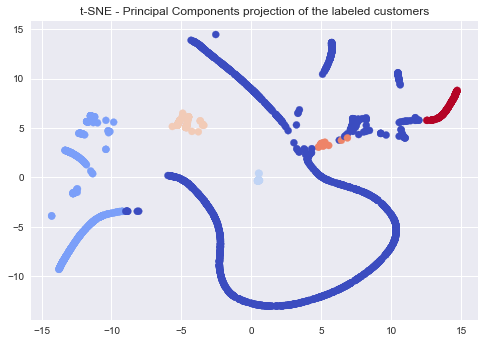

Silhouette Coefficient: 0.57
Davies_Bouldin score: 0.52
Loop 5:


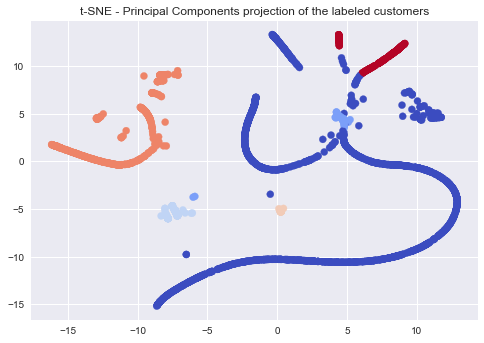

Silhouette Coefficient: 0.58
Davies_Bouldin score: 0.56
Loop 6:


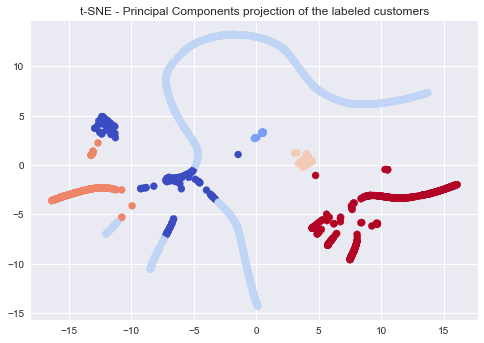

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.89
Loop 7:


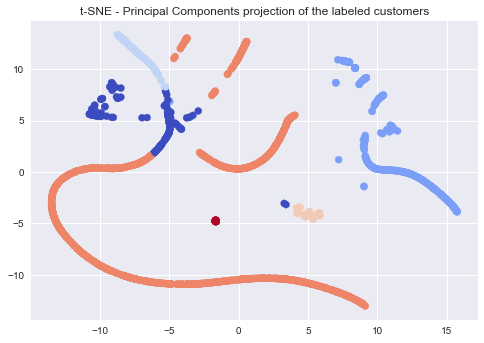

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.84
Loop 8:


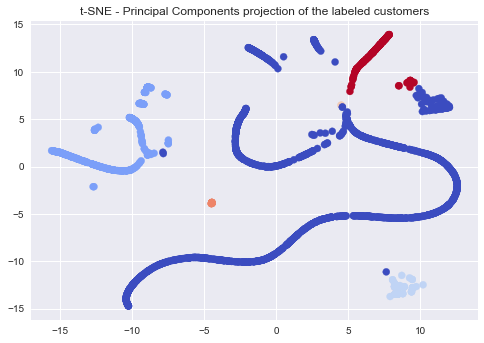

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.47
Loop 9:


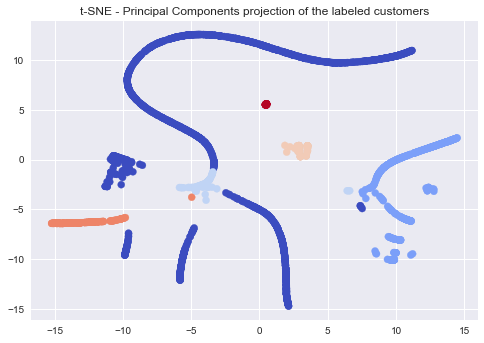

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.60


Mean of Silhouette Coefficient with ward: 0.59
Mean of Davies_Bouldin score with ward: 0.65


Linkage is:  complete
Affinity is:  euclidean
Loop 0:


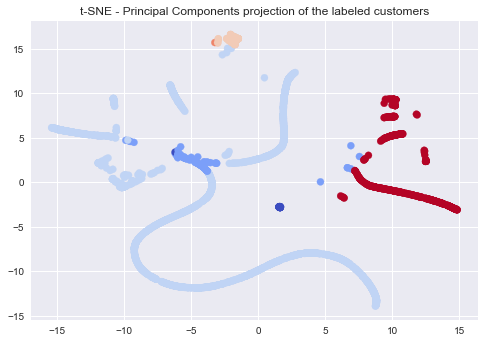

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.60
Loop 1:


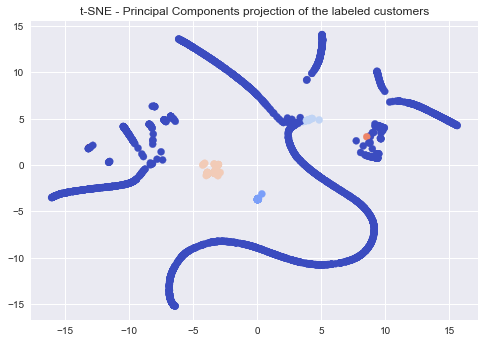

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.44
Loop 2:


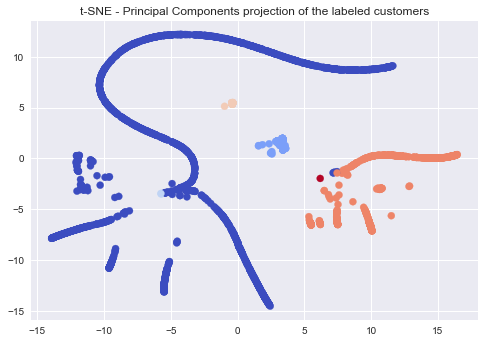

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.49
Loop 3:


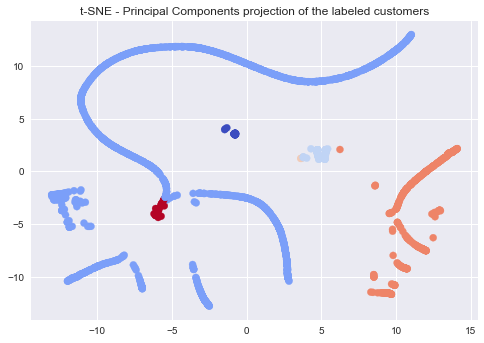

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.52
Loop 4:


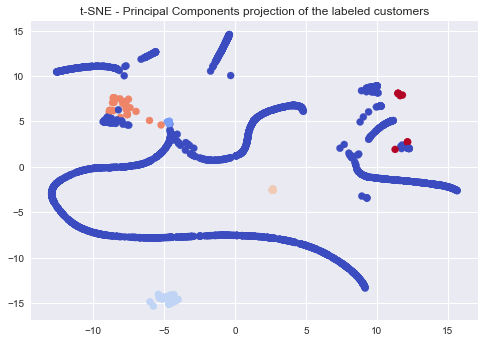

Silhouette Coefficient: 0.47
Davies_Bouldin score: 0.65
Loop 5:


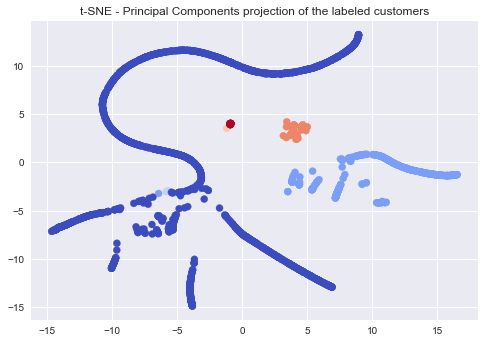

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.44
Loop 6:


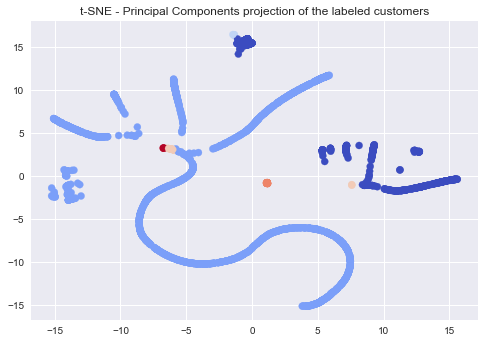

Silhouette Coefficient: 0.57
Davies_Bouldin score: 0.65
Loop 7:


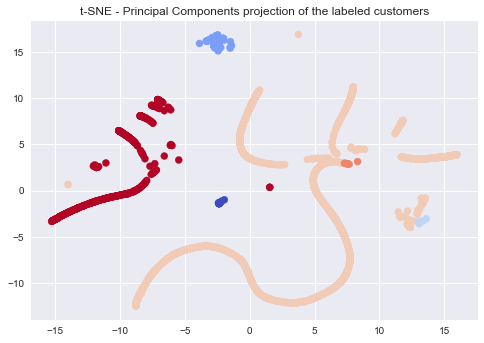

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.56
Loop 8:


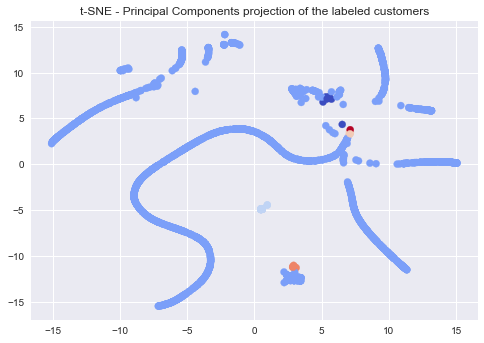

Silhouette Coefficient: 0.66
Davies_Bouldin score: 0.52
Loop 9:


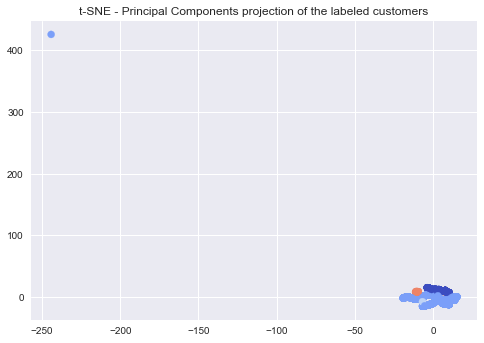

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.38


Mean of Silhouette Coefficient with complete: 0.59
Mean of Davies_Bouldin score with complete: 0.52


Linkage is:  complete
Affinity is:  manhattan
Loop 0:


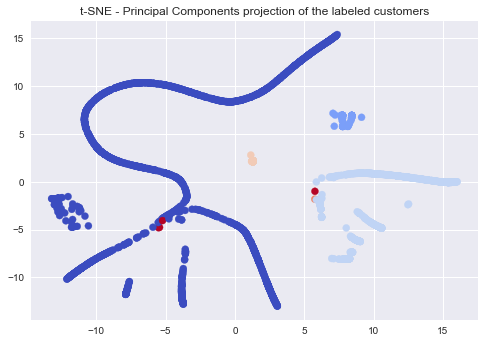

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.51
Loop 1:


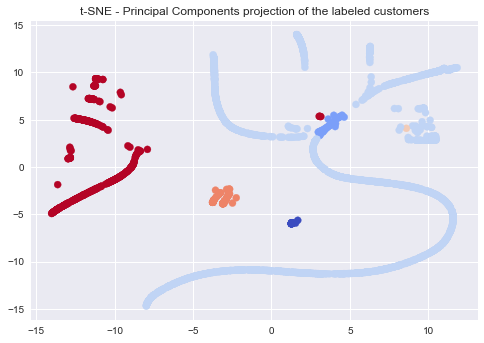

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.51
Loop 2:


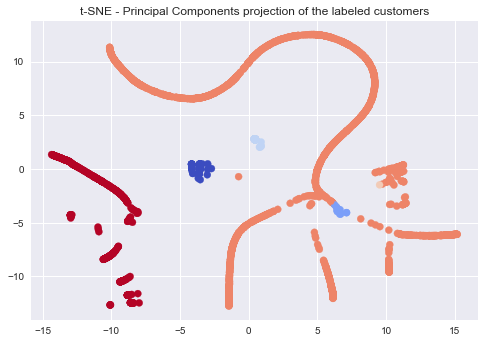

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.49
Loop 3:


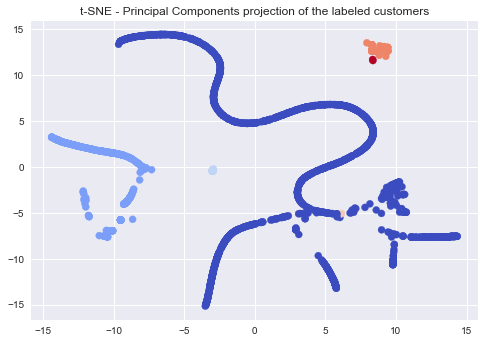

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.50
Loop 4:


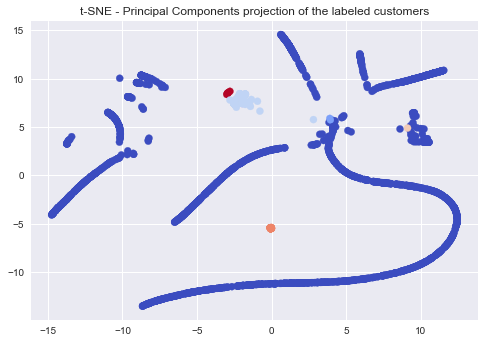

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.53
Loop 5:


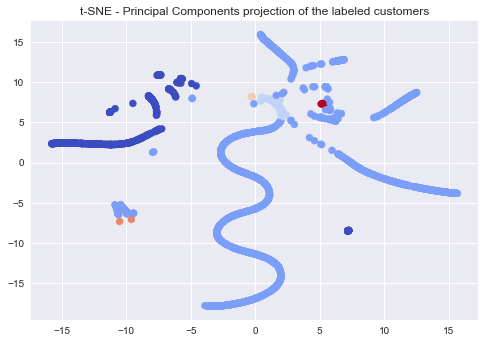

Silhouette Coefficient: 0.54
Davies_Bouldin score: 0.65
Loop 6:


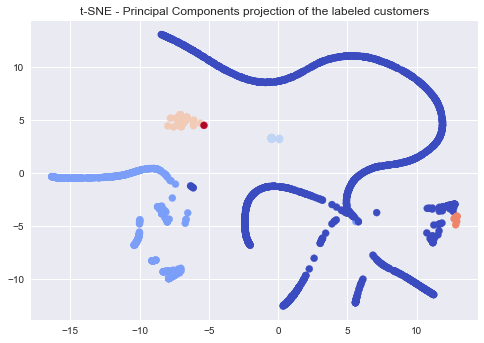

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.51
Loop 7:


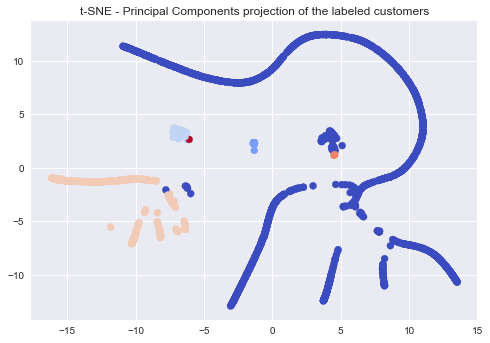

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.45
Loop 8:


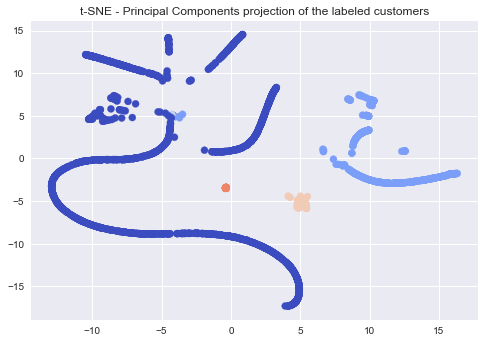

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.41
Loop 9:


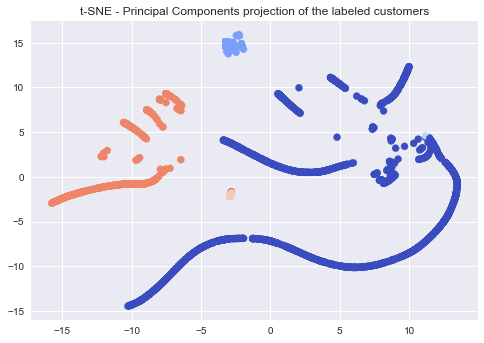

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.42


Mean of Silhouette Coefficient with complete: 0.59
Mean of Davies_Bouldin score with complete: 0.50


Linkage is:  average
Affinity is:  euclidean
Loop 0:


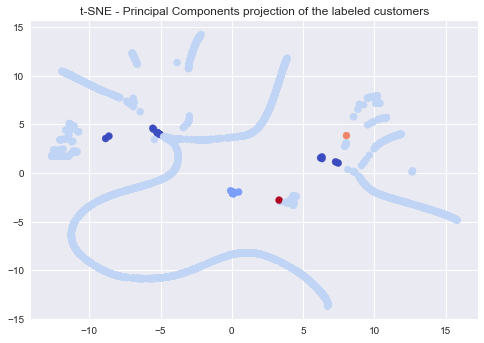

Silhouette Coefficient: 0.62
Davies_Bouldin score: 0.53
Loop 1:


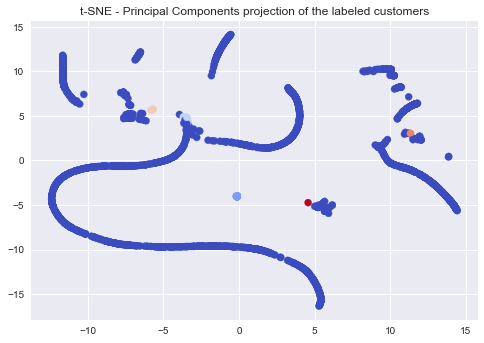

Silhouette Coefficient: 0.66
Davies_Bouldin score: 0.38
Loop 2:


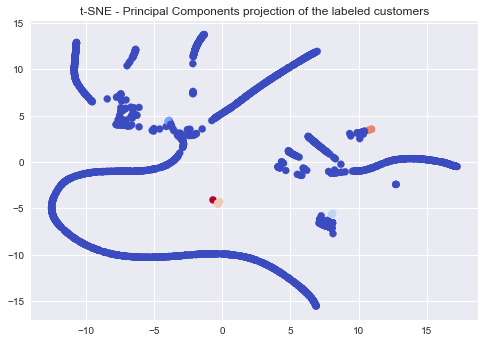

Silhouette Coefficient: 0.65
Davies_Bouldin score: 0.35
Loop 3:


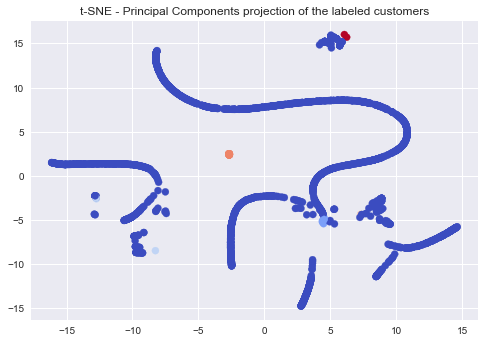

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.42
Loop 4:


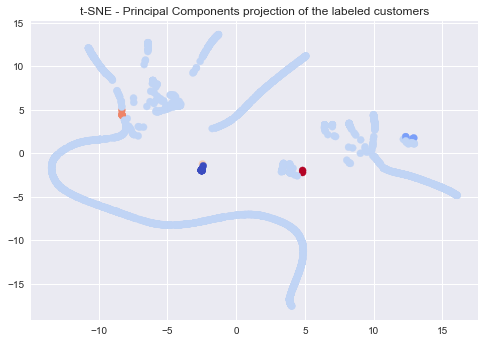

Silhouette Coefficient: 0.67
Davies_Bouldin score: 0.37
Loop 5:


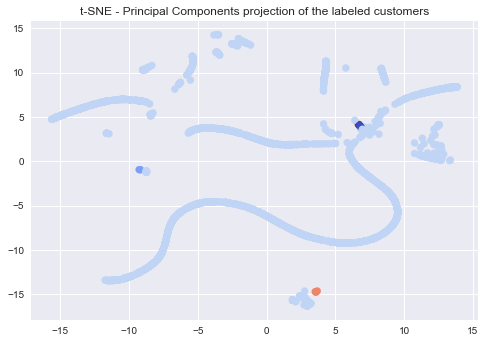

Silhouette Coefficient: 0.75
Davies_Bouldin score: 0.39
Loop 6:


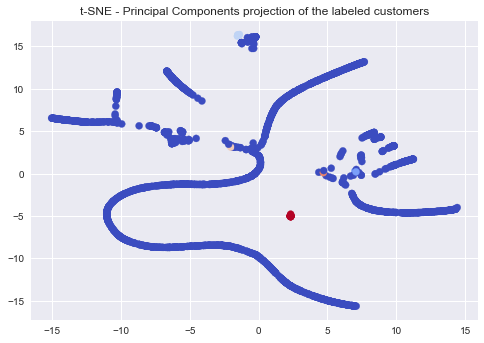

Silhouette Coefficient: 0.70
Davies_Bouldin score: 0.33
Loop 7:


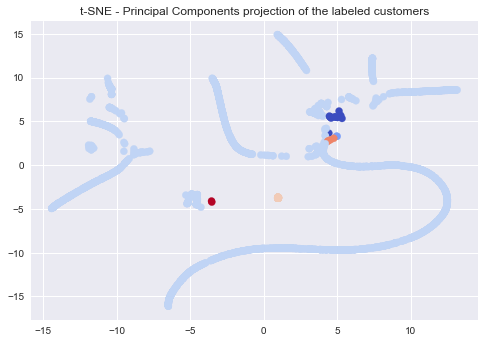

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.50
Loop 8:


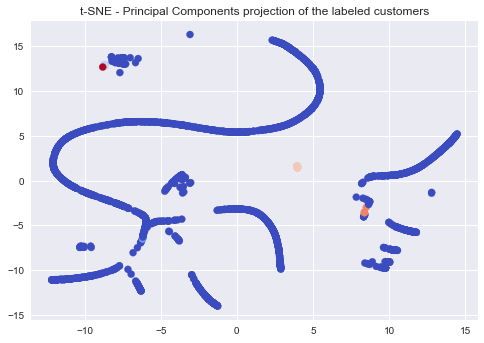

Silhouette Coefficient: 0.65
Davies_Bouldin score: 0.35
Loop 9:


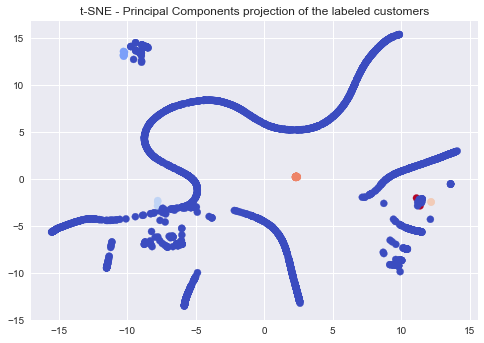

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.55


Mean of Silhouette Coefficient with average: 0.65
Mean of Davies_Bouldin score with average: 0.42


Linkage is:  average
Affinity is:  manhattan
Loop 0:


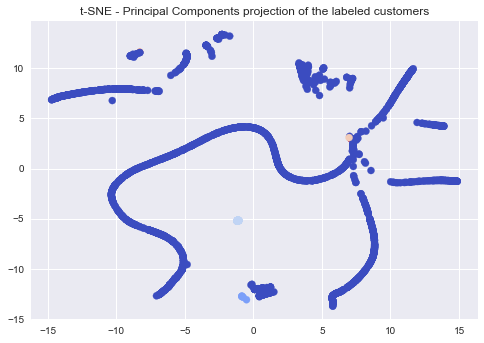

Silhouette Coefficient: 0.63
Davies_Bouldin score: 0.26
Loop 1:


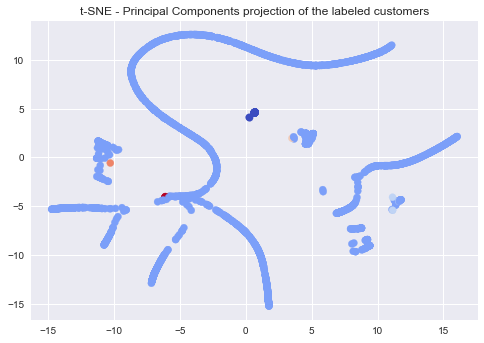

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.40
Loop 2:


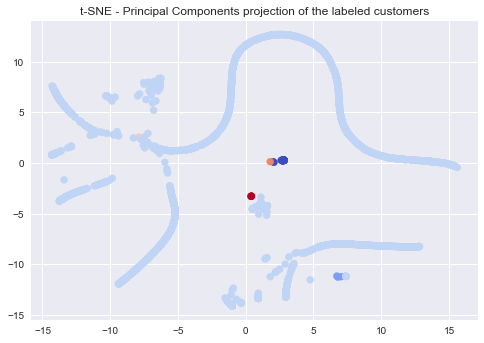

Silhouette Coefficient: 0.67
Davies_Bouldin score: 0.29
Loop 3:


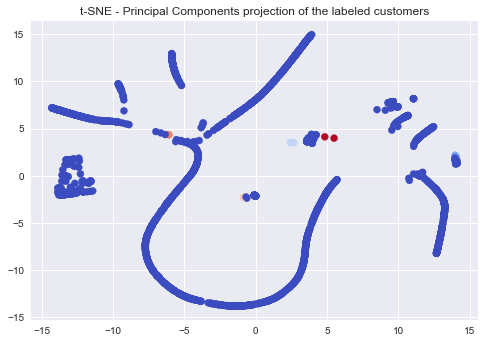

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.50
Loop 4:


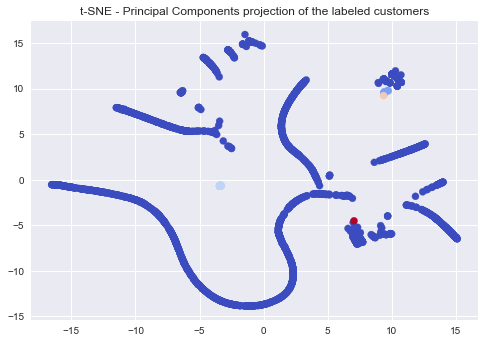

Silhouette Coefficient: 0.68
Davies_Bouldin score: 0.32
Loop 5:


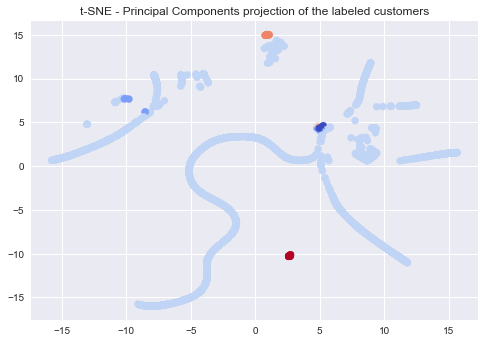

Silhouette Coefficient: 0.63
Davies_Bouldin score: 0.55
Loop 6:


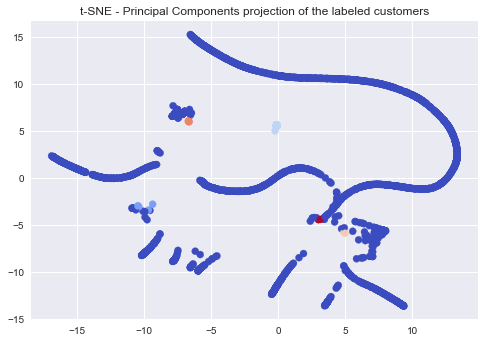

Silhouette Coefficient: 0.67
Davies_Bouldin score: 0.42
Loop 7:


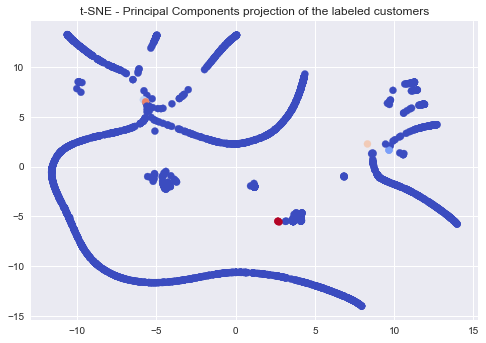

Silhouette Coefficient: 0.73
Davies_Bouldin score: 0.33
Loop 8:


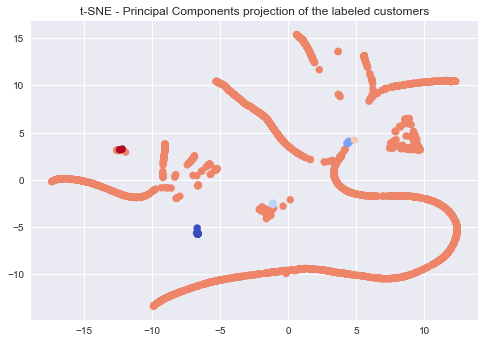

Silhouette Coefficient: 0.67
Davies_Bouldin score: 0.38
Loop 9:


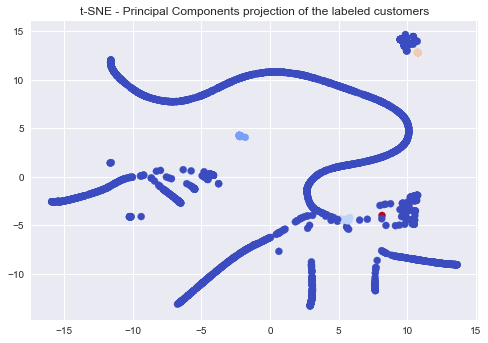

Silhouette Coefficient: 0.69
Davies_Bouldin score: 0.33


Mean of Silhouette Coefficient with average: 0.66
Mean of Davies_Bouldin score with average: 0.38


Linkage is:  single
Affinity is:  euclidean
Loop 0:


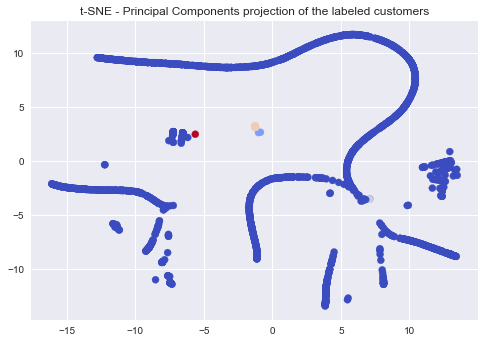

Silhouette Coefficient: 0.69
Davies_Bouldin score: 0.22
Loop 1:


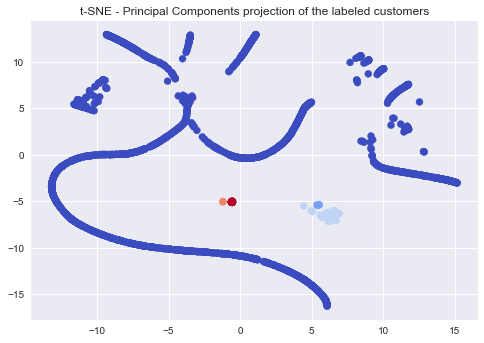

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.38
Loop 2:


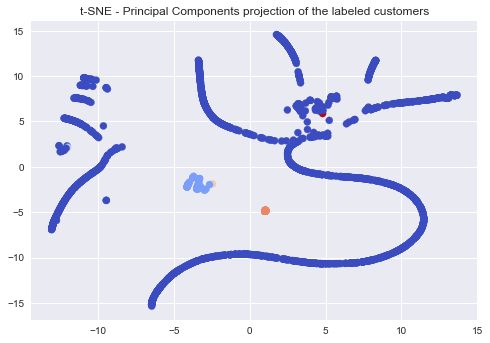

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.37
Loop 3:


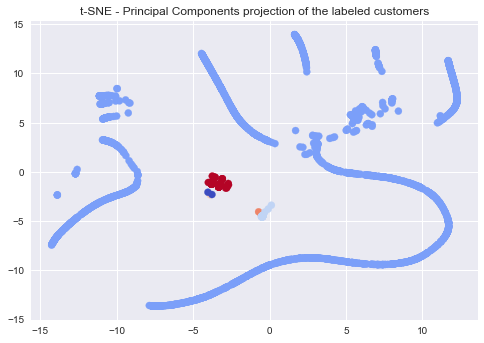

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.50
Loop 4:


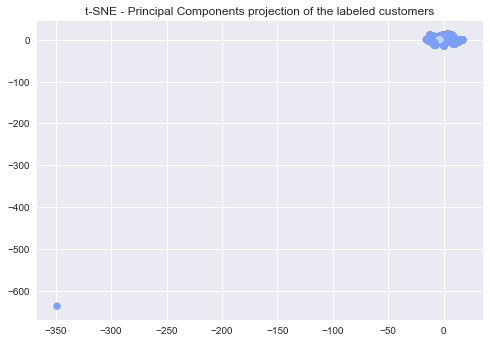

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.39
Loop 5:


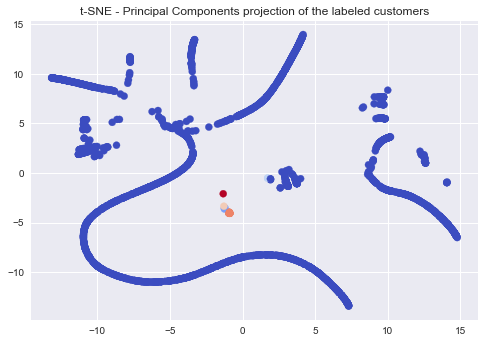

Silhouette Coefficient: 0.69
Davies_Bouldin score: 0.22
Loop 6:


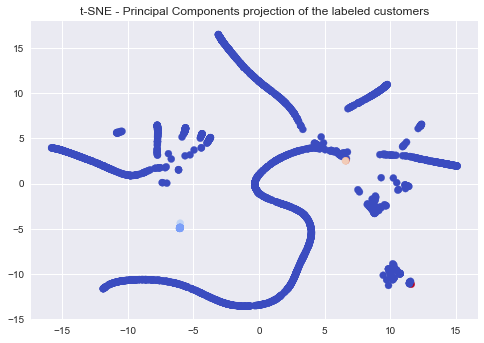

Silhouette Coefficient: 0.68
Davies_Bouldin score: 0.19
Loop 7:


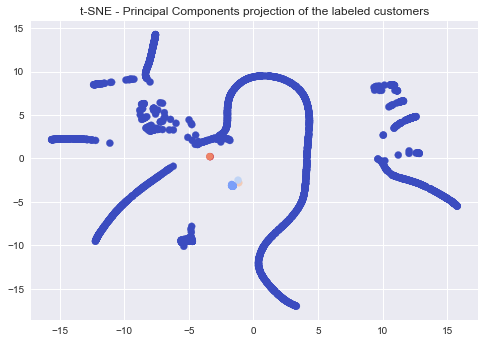

Silhouette Coefficient: 0.70
Davies_Bouldin score: 0.19
Loop 8:


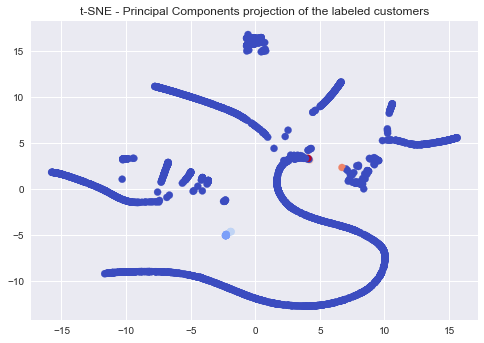

Silhouette Coefficient: 0.69
Davies_Bouldin score: 0.24
Loop 9:


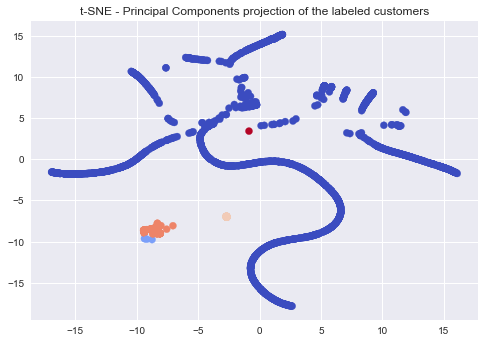

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.46


Mean of Silhouette Coefficient with single: 0.64
Mean of Davies_Bouldin score with single: 0.32


Linkage is:  single
Affinity is:  manhattan
Loop 0:


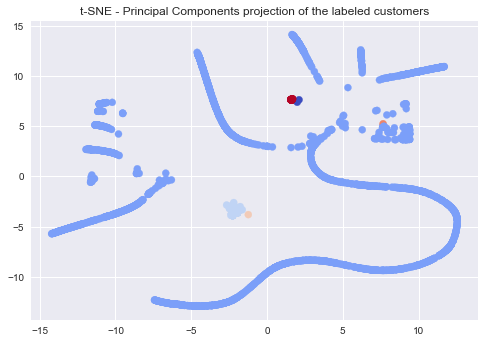

Silhouette Coefficient: 0.60
Davies_Bouldin score: 0.41
Loop 1:


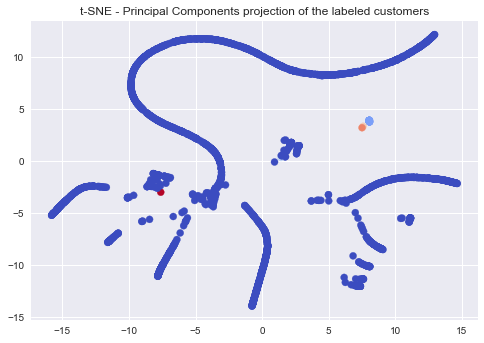

Silhouette Coefficient: 0.69
Davies_Bouldin score: 0.20
Loop 2:


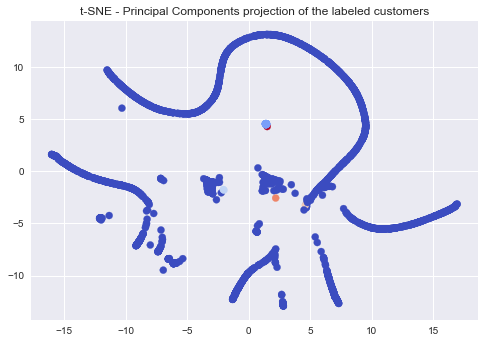

Silhouette Coefficient: 0.68
Davies_Bouldin score: 0.23
Loop 3:


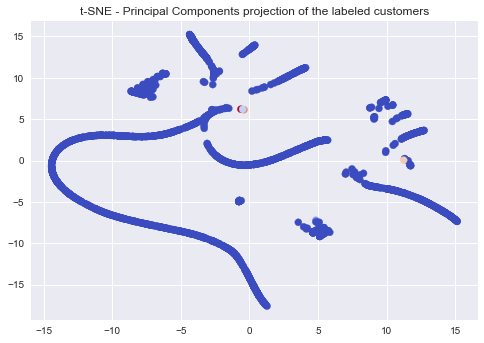

Silhouette Coefficient: 0.82
Davies_Bouldin score: 0.10
Loop 4:


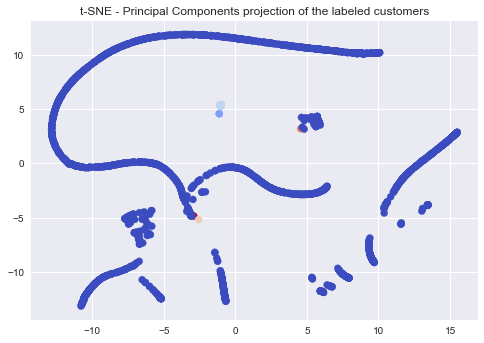

Silhouette Coefficient: 0.70
Davies_Bouldin score: 0.19
Loop 5:


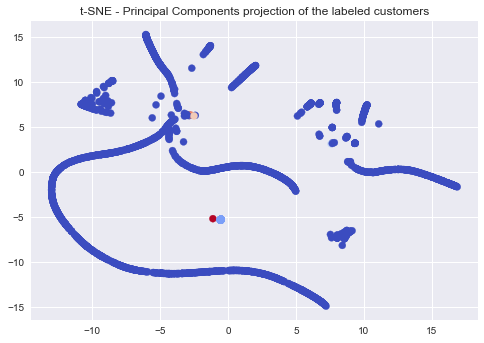

Silhouette Coefficient: 0.69
Davies_Bouldin score: 0.19
Loop 6:


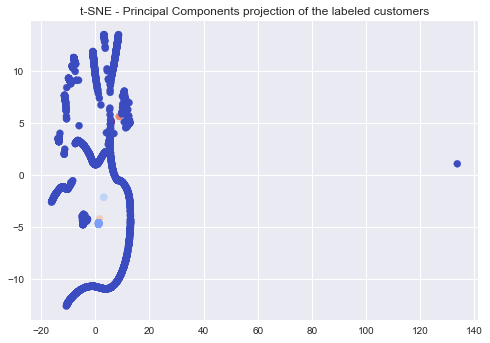

Silhouette Coefficient: 0.70
Davies_Bouldin score: 0.21
Loop 7:


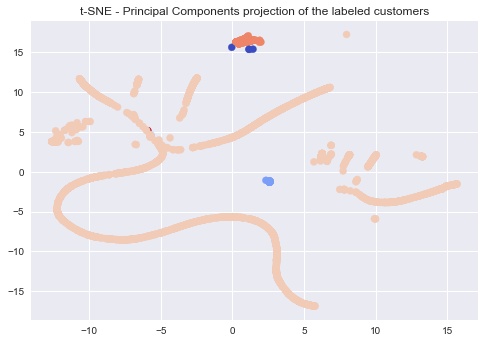

Silhouette Coefficient: 0.61
Davies_Bouldin score: 0.45
Loop 8:


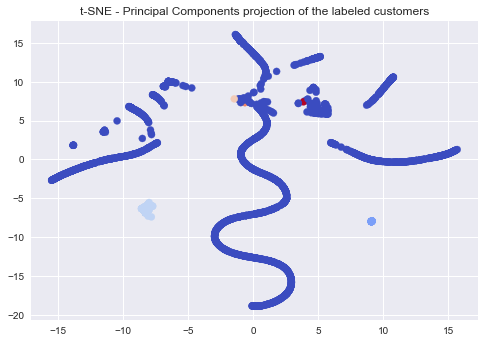

Silhouette Coefficient: 0.59
Davies_Bouldin score: 0.34
Loop 9:


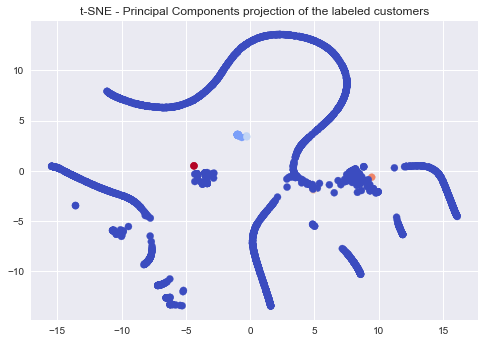

Silhouette Coefficient: 0.67
Davies_Bouldin score: 0.26


Mean of Silhouette Coefficient with single: 0.67
Mean of Davies_Bouldin score with single: 0.26


In [16]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

linkage_list = ['ward', 'complete', 'average', 'single']
affinity_list = ['euclidean', 'manhattan']
for link in linkage_list:
    for aff in affinity_list:
        if (link=='ward')&(aff!='euclidean'):
            break;
        print("\n")
        print("Linkage is: ", link)
        print("Affinity is: ", aff)
        silh_list = []
        db_score_list = []
        with mlflow.start_run():
            for i in range(10):
                print("Loop {}:".format(i))
                idx_agglo = np.random.choice(np.arange(len(X_scaled)), 2000, replace=False)
                X_agglo = X_scaled[idx_agglo]
                agglo = AgglomerativeClustering(n_clusters=6, affinity=aff, linkage=link).fit(X_agglo)

                # Mlflow: Log model and parameters
                mlflow.log_param('model', 'AgglomerativeClustering')
                mlflow.log_param('n_clusters', 6)
                mlflow.log_param('affinity', aff)
                mlflow.log_param('linkage', link)
                mlflow.sklearn.log_model(agglo, 'AgglomerativeClustering')

                # t-SNE
                X_agglo_tsne = tsne.fit_transform(X_agglo)
                # Plot points
                plt.scatter(X_agglo_tsne[:, 0], X_agglo_tsne[:, 1], c=agglo.labels_, s=50)
                plt.title("t-SNE - Principal Components projection of the labeled customers")
                plt.show()

                # Evaluate Agglomerative clustering
                silh = metrics.silhouette_score(X_agglo, agglo.labels_)
                db_score = metrics.davies_bouldin_score(X_agglo, agglo.labels_)
                silh_list.append(silh)
                db_score_list.append(db_score)
                print("Silhouette Coefficient: %0.2f" % silh)
                print("Davies_Bouldin score: %0.2f" % db_score)

                mlflow.log_metric('Silhouette Coefficient', silh, step=i)
                mlflow.log_metric('Davies_Bouldin score', db_score, step=i)

            print("\n")
            print("Mean of Silhouette Coefficient with {}: {:.2f}".format(link, mean(silh_list)))
            print("Mean of Davies_Bouldin score with {}: {:.2f}".format(link, mean(db_score_list)))
            mlflow.log_metric('Mean-Silhouette Coefficient', mean(silh_list))
            mlflow.log_metric('Mean-Davies_Bouldin score', mean(db_score_list))

